,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Evaluating Linear Regression...
LinearRegression - MSE: 4908290571.35, R2 Score: 0.63

Evaluating Ridge Regression...
Ridge - MSE: 4909247315.72, R2 Score: 0.63

Evaluating Lasso Regression...


c:\Users\daryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


Lasso - MSE: 4908306014.02, R2 Score: 0.63

Evaluating Decision Tree...
DecisionTreeRegressor - MSE: 5113808887.99, R2 Score: 0.61

Evaluating SVM...
SVR - MSE: 8712197641.04, R2 Score: 0.34

Evaluating Random Forest...
RandomForestRegressor - MSE: 2395290032.47, R2 Score: 0.82


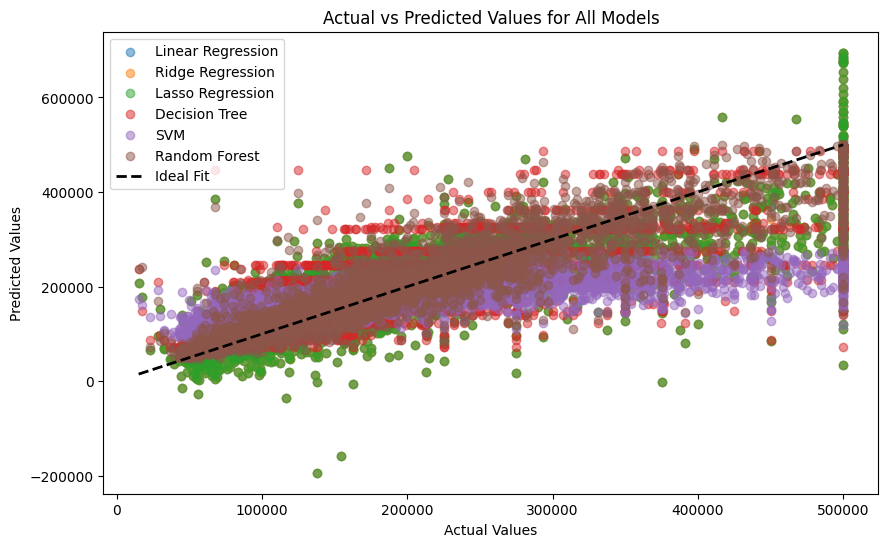

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("../data/cali-housing.csv")

# Display basic information
display(df.head())
display(df.info())
display(df.describe())

# Handle missing values and encoding
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Categorize 'ocean_proximity'
categorical_features = ['ocean_proximity']
numerical_features = df.drop(columns=['median_house_value', 'ocean_proximity']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_features),
    ('cat', Pipeline([('imputer', cat_imputer), ('encoder', one_hot_encoder)]), categorical_features)
])

# Selecting features and target
X = df.drop(columns=['median_house_value'])  # Assuming 'median_house_value' is the target
y = df['median_house_value']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")
    return y_pred

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=5000),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "SVM": SVR(kernel='rbf', C=100, gamma=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

predictions = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    predictions[name] = evaluate_model(model, X_train_transformed, X_test_transformed, y_train, y_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
for name, pred in predictions.items():
    plt.scatter(y_test, pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for All Models")
plt.legend()
plt.show()
